In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing the required libraries
import pandas as pd               
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/city_day.csv')

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.head(7)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN


In [ ]:
df=df.drop(['Date'],axis=1)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.4+ MB


In [ ]:
df.shape

(29531, 15)

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(6236, 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


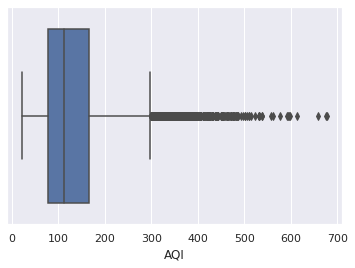

In [ ]:
sns.boxplot(df['AQI'])

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

PM2.5      45.5150
PM10       83.8000
NO         14.3125
NO2        27.6550
NOx        25.0750
NH3        18.1550
CO          0.5700
SO2         7.8725
O3         23.1550
Benzene     3.7100
Toluene    10.8300
Xylene      2.7300
AQI        88.0000
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000,4134.000000
mean,43.265215,94.623524,9.554436,26.290784,21.885133,16.795259,0.663055,9.934383,33.674037,2.186014,7.040157,1.419037,107.031688
std,25.158400,47.719182,7.357719,14.693927,12.834074,10.776928,0.331084,4.863464,15.758944,1.991924,6.766129,1.532113,51.107528
min,2.000000,7.800000,0.250000,0.510000,0.600000,0.120000,0.000000,1.150000,1.550000,0.000000,0.000000,0.000000,23.000000
25%,23.622500,58.345000,4.042500,13.475000,12.190000,9.482500,0.440000,6.220000,21.992500,0.530000,1.800000,0.210000,70.000000
50%,38.745000,88.800000,7.610000,24.500000,19.665000,13.085000,0.650000,9.020000,31.370000,1.700000,4.845000,0.860000,99.000000
75%,58.310000,121.245000,12.760000,36.172500,28.227500,22.137500,0.870000,12.650000,43.530000,3.227500,10.167500,2.000000,130.000000
max,141.210000,274.680000,40.700000,85.010000,75.630000,55.380000,1.910000,26.200000,80.000000,10.170000,29.240000,7.090000,297.000000


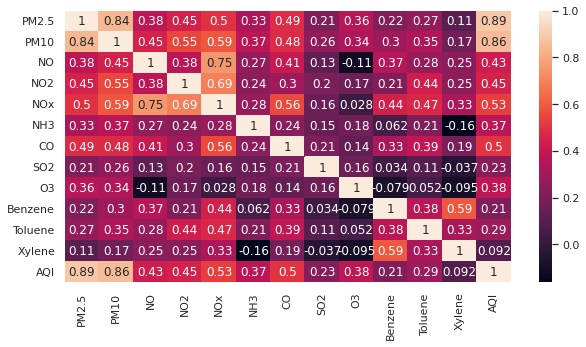

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,annot=True)

In [ ]:
df=df.drop(['PM10'],axis=1)

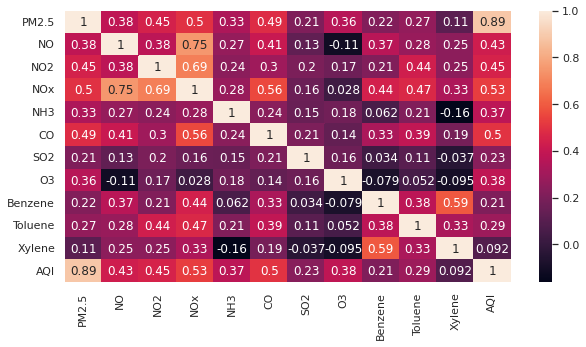

In [ ]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
x=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y=df.iloc[:,13].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=19,metric='minkowski')
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['Satisfactory' 'Moderate']
 ['Satisfactory' 'Moderate']
 ['Satisfactory' 'Moderate']
 ...
 ['Satisfactory' 'Satisfactory']
 ['Satisfactory' 'Moderate']
 ['Satisfactory' 'Satisfactory']]


In [ ]:
accuracy_score(y_test,y_pred)

0.8114423851732474

In [ ]:
accuracy_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score.mean())

In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  error_rate.append(1-score.mean())


Text(0.5, 1.0, 'error_rate vs k value')

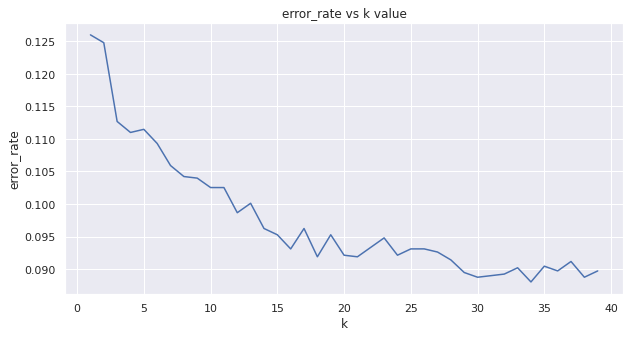

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate)
plt.xlabel('k')
plt.ylabel('error_rate')
plt.title('error_rate vs k value')